<a href="https://colab.research.google.com/github/Nicolasalan/Object-Detection-Tensorflow/blob/main/DataSet_Mask_TensorFlow_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Selecionar GPU**

**Para iniciarmos a geração de DataSet Sintético, primeiro precisamos de poder computacional, mais precisamente uma GPU forte para processar os comandos.**

Dentro do Google Colab tem essa opção de escolher a GPU de forma  grátis. No menu principal clicar em “Tempo de execução”.
Captura de ecrã 2022-08-10, às 13.53.00.png

Em seguida clique em “alterar tipo de Tempo de execução”.

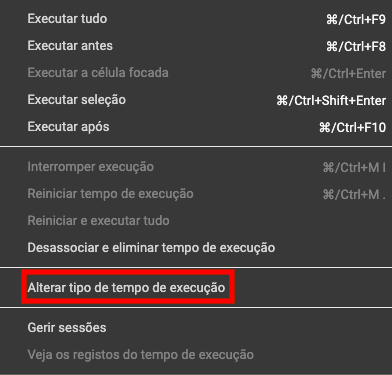

Dentro desse campo, selecionar a opção de GPU em “Acelerador de hardware” e selecionar RAM Alta em “Forma de tempo de execução”.

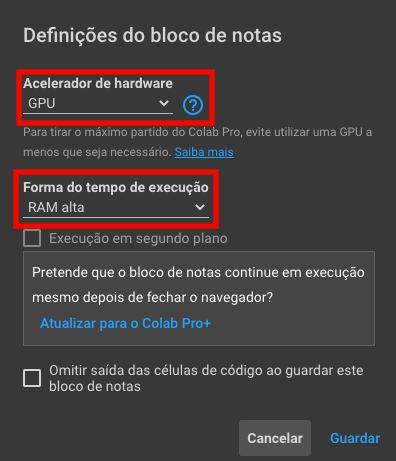

**Esse comando verifica qual GPU o Colab disponibilizou para execução.**

In [ ]:
!nvidia-smi

Fri Aug 12 16:47:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Instalações**

**Lembrando:** Esse processo de instalação pode demorar um pouco

## Instalando Tensorflow 1.14.0

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3447, done.
remote: Counting objects: 100% (3447/3447), done.
remote: Compressing objects: 100% (2888/2888), done.
remote: Total 3447 (delta 896), reused 1469 (delta 502), pack-reused 0
Receiving objects: 100% (3447/3447), 46.48 MiB | 35.15 MiB/s, done.
Resolving deltas: 100% (896/896), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf1/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694899 sha256=ee3f922d1256307d31273fe746e0351bcc8d39bbdb054ec898d66487340292e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-bffee11s/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
%cd /content/models/research
!wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip

/content/models/research
--2022-08-12 16:47:46--  https://github.com/google/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip [following]
--2022-08-12 16:47:46--  https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2022-08-12 16:47:47 ERROR 404: Not Found.



In [ ]:
!pip2 install tensorflow==1.14.0
!pip2 install tensorflow-gpu==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.2MB 1.3MB/s 
     |████████████████████████████████| 21.2MB 1.1MB/s 
     |████████████████████████████████| 296kB 59.2MB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 1.0MB 65.1MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 17.0MB 203kB/s 
     |████████████████████████████████| 122kB 46.0MB/s 
     |████████████████████████████████| 3.2MB 62.4MB/s 
     |████████████████████████████████| 491kB 43.0MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 2.8MB 62.1MB/s 
     |████████████████████████████████| 307kB 63.2MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
  Created wheel for grpcio: filename=grpcio-1.41.1-cp27-cp27mu-linux_x86_64.whl size=33845055 sha256=2976b8c5b0fc0ce61e1f9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377.0MB 39kB/s 


Verificar versão do TensorFlow instalada

In [ ]:
!pip2 show tensorflow
!pip2 show tensorflow-gpu

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python2.7/dist-packages
Requires: grpcio, mock, keras-applications, wrapt, protobuf, keras-preprocessing, gast, tensorboard, wheel, numpy, termcolor, six, enum34, absl-py, tensorflow-estimator, google-pasta, backports.weakref, astor
Required-by: 
Name: tensorflow-gpu
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python2.7/dist-packages
Requires: grpcio, mock, keras-applications, wrapt, protobuf, keras-preprocessing, gast, wheel, tensorboard, numpy, termcolor, six, absl-py, tensorflow-estimator, enum34, google-pasta, backports.weakref, astor
Required

## Instalando requerimentos

Esse comando clona o repositório contendo os scripts de geração do DataSet

In [ ]:
%cd /content/
!git clone https://github.com/Nicolasalan/Scripts-Dataset.git

/content
Cloning into 'Scripts-Dataset'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 71 (delta 17), reused 67 (delta 13), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
!rm /content/Scripts-Dataset/models/salience_model/model.ckpt-200.data-00000-of-00001

Baixar weight do repositorio e colocar no caminho `/content/Scripts-Dataset/models/salience_model`

In [ ]:
!curl -OL https://github.com/google/protobuf/releases/download/v3.4.0/protoc-3.4.0-linux-x86_64.zip
!unzip protoc-3.4.0-linux-x86_64.zip -d protoc3
!sudo mv protoc3/bin/* /usr/local/bin/
!sudo mv protoc3/include/* /usr/local/include/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1357k  100 1357k    0     0  2376k      0 --:--:-- --:--:-- --:--:-- 2376k
Archive:  protoc-3.4.0-linux-x86_64.zip
   creating: protoc3/include/
   creating: protoc3/include/google/
   creating: protoc3/include/google/protobuf/
  inflating: protoc3/include/google/protobuf/struct.proto  
  inflating: protoc3/include/google/protobuf/type.proto  
  inflating: protoc3/include/google/protobuf/descriptor.proto  
  inflating: protoc3/include/google/protobuf/api.proto  
  inflating: protoc3/include/google/protobuf/empty.proto  
   creating: protoc3/include/google/protobuf/compiler/
  inflating: protoc3/include/google/protobuf/compiler/plugin.proto  
  inflating: protoc3/include/g

### Instalações para Python2

In [ ]:
%cd /content/Scripts-Dataset/
!pip2 install -r requirements.txt

/content/Scripts-Dataset
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 757kB 7.9MB/s 
     |████████████████████████████████| 2.1MB 57.8MB/s 
     |████████████████████████████████| 5.5MB 44.0MB/s 
     |████████████████████████████████| 1.9MB 33.4MB/s 
     |████████████████████████████████| 28.2MB 663kB/s 
     |████████████████████████████████| 81kB 12.0MB/s 
     |████████████████████████████████| 24.8MB 56.9MB/s 
     |████████████████████████████████| 235kB 75.9MB/s 
     |████████████████████████████████| 25.5MB 32.2MB/s 
     |████████████████████████████████| 460kB 78.2MB/s 
     |████████████████████████████████| 133kB 75.6MB/s 
     |████████████████████████████████| 122kB 75.2MB/s 
     |████████████████████████████████| 112kB 76.6MB/s 
     |████████████████████████████████| 10.1MB 22.0MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |█████████████████████████████

### Instalações para Python3

In [ ]:
%%bash
pip3 install pandas==0.23.1
pip3 install Pillow==7.0.0
pip3 install opencv-python
pip3 install tqdm
pip3 install protobuf
pip3 install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
    Running setup.py install for pandas: started
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to /usr/local/lib/python3.7/dist-packages/pandas-1.3.5.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~andas-1.3.5.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/pandas/
   from /usr/local/lib/python3.7/dist-packages/~andas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
Looking in indexes: https:/

  ERROR: Failed building wheel for pandas
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-8jb63g16/pandas_bf47755475cb40bfad1b92895658065a/setup.py'"'"'; __file__='"'"'/tmp/pip-install-8jb63g16/pandas_bf47755475cb40bfad1b92895658065a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-gyotcn3m/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pandas Check the logs for full command output.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requ

### Configurações Python2 no sistema Linux

In [ ]:
!sudo ln -sf /usr/bin/python2.7 /usr/bin/python

In [ ]:
!ls -l /usr/bin/python

lrwxrwxrwx 1 root root 18 Aug 12 17:05 /usr/bin/python -> /usr/bin/python2.7


Caso aparece algum erro referente ao protobuf

In [ ]:
# Selecionar na opcao "yes"
!sudo pip2 uninstall protobuf
!sudo apt-get remove python-protobuf
!sudo pip2 install protobuf

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Uninstalling protobuf-3.17.3:
  Would remove:
    /usr/local/lib/python2.7/dist-packages/google/protobuf/*
    /usr/local/lib/python2.7/dist-packages/protobuf-3.17.3-py2.7-nspkg.pth
    /usr/local/lib/python2.7/dist-packages/protobuf-3.17.3.dist-info/*
Proceed (y/n)? yes
Your response ('yes') was not one of the expected responses: y, n
Proceed (y/n)? e
Your response ('e') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled protobuf-3.17.3
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'python-protobuf' is not installed, so not removed
The following pac

In [ ]:
!pip2 install -U protobuf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Requirement already up-to-date: protobuf in /usr/local/lib/python2.7/dist-packages (3.17.3)


In [ ]:
!sudo apt install protobuf-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


# **Coletando imagens para geração do DataSet**

Conectar Google Colab + Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Passar imagens tiradas para o diretorio `images`

In [ ]:
%cd /content/Scripts-Dataset/models
!mkdir images

/content/Scripts-Dataset/models


No Drive criar pasta com o nome `imagens-dataset` e adicionar as pastas com os nomes dos objetos.
Dentro dessas pastas adicionar as imagens

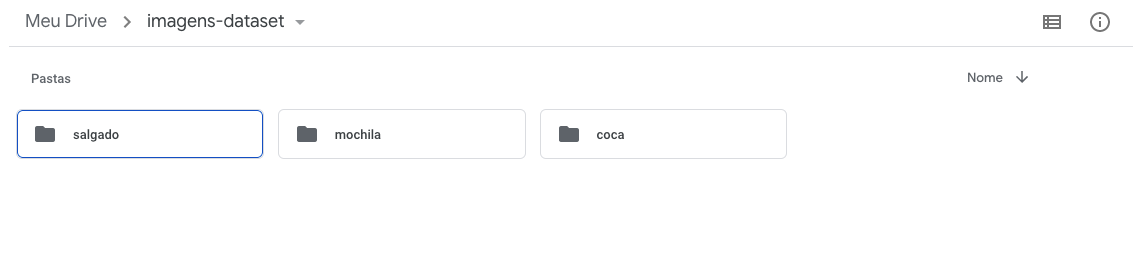

**Tudo em minusculo!!**

In [ ]:
!cp /content/drive/MyDrive/imagens-dataset/* /content/Scripts-Dataset/models/images

# **Pré-Processamento de imagens**

In [ ]:
root_folder = '/content/Scripts-Dataset/images'

In [ ]:
# nao executar essa linha de codigo (Em teste)
%cd /content/Scripts-Dataset/models/salience_model
!wget https://github.com/Nicolasalan/Scripts-Dataset/models/salience_model/model.ckpt-200.data-00000-of-00001/main.zip

## Rezise nas imagens (640x480)

In [ ]:
import os
import re
from PIL import Image

root_folder = '/content/Scripts-Dataset/images'

# The new width for images in the ROOT_PATH folder.
NEW_WIDTH = 640
NEW_HEIGHT = 480


def resize(root, file, new_width, new_height, new_img_name):
    original_img_path = os.path.join(root, file)
    new_img_path = os.path.join(root, new_img_name)

    pillow_img = Image.open(original_img_path)
    width, height = pillow_img.size

    new_img = pillow_img.resize((new_width, new_height), Image.LANCZOS)
    new_img.save(new_img_path)

    print('Resized: {}'.format(new_img_path))

    try:
        new_img.save(
            new_img_path,
            optimize=True,
            quality=50,
            exif=pillow_img.info.get('exif')
        )
    except:
        try:
            new_img.save(
                new_img_path,
                optimize=True,
                quality=50,
            )
        except:
            raise RuntimeError(f'Could not convert "{original_img_path}".')

    print(f'Saved at {new_img_path}')


def is_image(extension):
    extension_lowercase = extension.lower()
    return bool(re.search(r'^\.(jpg|png|JPG|pbm)$', extension_lowercase))


def files_checks(root, file):
    filename, extension = os.path.splitext(file)

    if not is_image(extension):
        return

    new_img_name = filename + extension

    resize(root=root, file=file, new_width=NEW_WIDTH, new_height=NEW_HEIGHT, new_img_name=new_img_name)


def files_loop(root, files):
    for file in files:
        files_checks(root, file)


def main(root_folder):
    for root, dirs, files in os.walk(root_folder):
        files_loop(root, files)


if __name__ == '__main__':
    root_folder = root_folder
    main(root_folder)

Instalação do imagemagick para processamento de imagem

In [ ]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-goth

## Formato das imagens (JPG, pbm, jpg)

In [ ]:
# Converter imagens jpg
%cd /content/Scripts-Dataset/images/'Nome da pasta do objeto'
!mogrify -format JPG *.jpg # converte a imagem de jpg para JPG
!rm *.jpg # deleta as imagens com extensao jpg

In [ ]:
# Converter imagens png
%cd /content/Scripts-Dataset/images/'Nome da pasta do objeto'
!mogrify -format JPG *.png # converte a imagem de png para JPG
!rm *.png # deleta as imagens com extensao png

Caso tenha outra extensão, é só acrescentar no final do comando

## Renomeando Imagens

In [ ]:
%cd /content/Scripts-Dataset/images/'Nome da pasta do objeto'
!x=1; for i in *; do mv -v "$i" "$x-image.JPG"; x=$((x+1)); done # renomeia as images no diretorio especificado

## Comandos uteis para gerenciamento de arquivo

In [ ]:
# Deletar todos os arquivos de uma pasta com extensao JPG
%cd /content/Scripts-Dataset/images/a
!rm *.JPG

# **Remoção de Fundo com Salience Model**

## Criação das máscaras

In [ ]:
%cd /content/Scripts-Dataset/models/
!python2.7 rmbg.py

**As máscaras geradas devem ser baixadas e ajustadas para que o contorno ser igual ao objeto.**

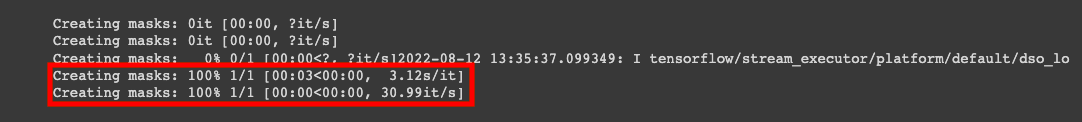

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

nome_objeto = 'obj1'
pasta = '/content/Scripts-Dataset/models/images' + nome_objeto
caminho_names = []
name_image = []
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        img_names = os.path.join(diretorio, arquivo)
        caminho_names.append(img_names)
        name_image.append(arquivo)
        
L = 4
W = 4

fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()

for i in np.arange(0, L*W):
    img = cv2.imread(caminho_names[i])
    axes[i].imshow(img)
    axes[i].set_title(name_image[i])
    axes[i].axis('off')

plt.show()

for i in range(len(caminho_names)):
    img = cv2.imread(caminho_names[i])
    plt.imshow(img)
    plt.title(name_image[i])
    plt.show()
    plt.pause(0.001)
    plt.close()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

nome_objeto = 'obj1'
dir = '/content/Scripts-Dataset/models/images' + nome_objeto

caminho_names = []
name_image = []
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        img_names = os.path.join(diretorio, arquivo)
        caminho_names.append(img_names)
        name_image.append(arquivo)

figure = plt.figure(figsize=(20, 20))

for i in range(len(caminho_names)):
    img = cv2.imread(caminho_names[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(caminho_names), i+1)
    plt.imshow(img)
    plt.title(name_image[i])
    plt.axis('off')

plt.show()

**Exemplo de Saida ...**

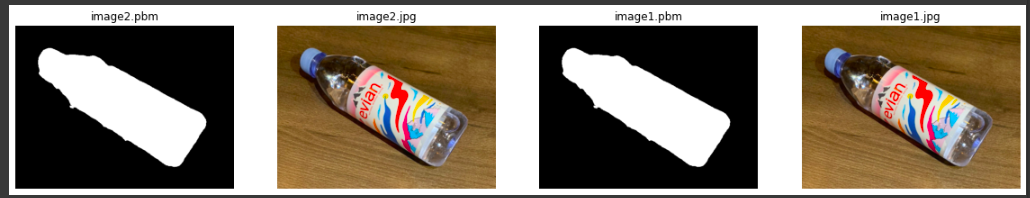

# **Gerar DataSet**

Mover o diretório `images` para `objects_dir` que esta no caminho `/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir`

In [ ]:
!cp -R /content/Scripts-Dataset/models/images/* /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir

## Gerar DataSet com anotações e arquivos yaml

In [ ]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir
%rm selected.txt

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir


Adicionar os nomes dos objetos na linha de código abaixo:

In [ ]:
%%writefile selected.txt
Colocar aqui ... pulando linha ... e apagando esse comentario

Writing selected.txt


Segue um exemplo ...

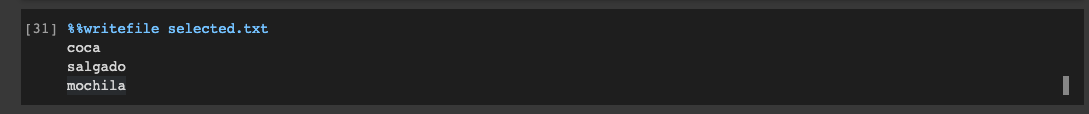

**Converter imagens de JPG para jpg**

In [ ]:
# Converter imagens jpg caso esteja em JPG (backgrounds)
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds/
!mogrify -format jpg *.JPG # converte a imagem de jpg para JPG
!rm *.JPG # deleta as imagens com extensao jpg

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds


In [ ]:
# Converter imagens jpg (objetcs)
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/images/arroz
!mogrify -format jpg *.JPG # converte a imagem de jpg para JPG
!rm *.JPG # deleta as imagens com extensao jpg

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/images/arroz


In [ ]:
import os
import re
from PIL import Image

root_folder = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds'

# The new width for images in the ROOT_PATH folder.
NEW_WIDTH = 640
NEW_HEIGHT = 480


def resize(root, file, new_width, new_height, new_img_name):
    original_img_path = os.path.join(root, file)
    new_img_path = os.path.join(root, new_img_name)

    pillow_img = Image.open(original_img_path)
    width, height = pillow_img.size

    new_img = pillow_img.resize((new_width, new_height), Image.LANCZOS)
    new_img.save(new_img_path)

    print('Resized: {}'.format(new_img_path))

    try:
        new_img.save(
            new_img_path,
            optimize=True,
            quality=50,
            exif=pillow_img.info.get('exif')
        )
    except:
        try:
            new_img.save(
                new_img_path,
                optimize=True,
                quality=50,
            )
        except:
            raise RuntimeError(f'Could not convert "{original_img_path}".')

    print(f'Saved at {new_img_path}')


def is_image(extension):
    extension_lowercase = extension.lower()
    return bool(re.search(r'^\.(jpg|png|JPG|pbm)$', extension_lowercase))


def files_checks(root, file):
    filename, extension = os.path.splitext(file)

    if not is_image(extension):
        return

    new_img_name = filename + extension

    resize(root=root, file=file, new_width=NEW_WIDTH, new_height=NEW_HEIGHT, new_img_name=new_img_name)


def files_loop(root, files):
    for file in files:
        files_checks(root, file)


def main(root_folder):
    for root, dirs, files in os.walk(root_folder):
        files_loop(root, files)


if __name__ == '__main__':
    root_folder = root_folder
    main(root_folder)

Resized: /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds/back.jpg
Saved at /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds/back.jpg


### Configurações da geração das imagens

Nessa etapa de geração do DataSet é a mais importante, primeiro precisamos gerar um número pequeno e ver como o script gera o dataset, como tamanho do objeto, numero de vezes que aparece na imagem, angulo e outros parâmetros. Caso a geração esteja ruim, voltar no processamento de imagem para verificar se todas as imagens estão no mesma proporção ou verificar nomes duplicados, além disso, outros erros que acontecem.


*   Tamanho das imagens 
*   Imagens com nomes duplicados
*   Verificar Instalaçōes
*   Verificar se confere o nome da imagem ser o mesmo da mascara
*   Verificar extensão

Estou listando esses problemas porque ja tive problemas com todos eles.









In [ ]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/
%rm defaults.py

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation


Modificar somente as linhas com `<<<<<<<<<<<<<<`

In [ ]:
%%writefile defaults.py
# coding=utf-8

BACKGROUND_DIR = 'demo_data_dir/backgrounds/'
BACKGROUND_GLOB_STRING = '*.jpg'
POISSON_BLENDING_DIR = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/pb'
SELECTED_LIST_FILE = 'demo_data_dir/selected.txt'
DISTRACTOR_LIST_FILE = 'demo_data_dir/neg_list.txt'
DISTRACTOR_DIR = 'demo_data_dir/distractor_objects_dir/'
DISTRACTOR_GLOB_STRING = '*.jpg'
INVERTED_MASK = False # Defina como verdadeiro se os pixels brancos representarem o plano de fundo

# Parameters for generator
NUMBER_OF_WORKERS = 4
BLENDING_LIST = ['none']

# Parameters for images
MIN_NO_OF_OBJECTS = 1 # <<<<<<<<<<<<<<
MAX_NO_OF_OBJECTS = 3 # <<<<<<<<<<<<<<
MIN_NO_OF_DISTRACTOR_OBJECTS = 0
MAX_NO_OF_DISTRACTOR_OBJECTS = 0
WIDTH = 640
HEIGHT = 480
MAX_ATTEMPTS_TO_SYNTHESIZE = 20

# Parameters for objects in images
MIN_SCALE = 0.15 # min scale for scale augmentation ---mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_SCALE = 0.20 # max scale for scale augmentation ----mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_DEGREES = 90 # rotação máxima permitida durante o aumento de rotação # <<<<<<<<<<<<<<
MAX_TRUNCATION_FRACTION = 0.25 # fração máxima a ser truncada = MAX_TRUNCACTION_FRACTION*(WIDTH/HEIGHT)
MAX_ALLOWED_IOU = 0.1 # IOU > MAX_ALLOWED_IOU é considerado uma oclusão
MIN_WIDTH = 6 # Largura mínima do objeto a ser usado para geração de dados # <<<<<<<<<<<<<<
MIN_HEIGHT = 6 # Altura mínima do objeto a ser usado para geração de dados # <<<<<<<<<<<<<<

Writing defaults.py


In [ ]:
%cat defaults.py

# coding=utf-8

BACKGROUND_DIR = 'demo_data_dir/backgrounds/'
BACKGROUND_GLOB_STRING = '*.jpg'
POISSON_BLENDING_DIR = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/pb'
SELECTED_LIST_FILE = 'demo_data_dir/selected.txt'
DISTRACTOR_LIST_FILE = 'demo_data_dir/neg_list.txt'
DISTRACTOR_DIR = 'demo_data_dir/distractor_objects_dir/'
DISTRACTOR_GLOB_STRING = '*.jpg'
INVERTED_MASK = False # Defina como verdadeiro se os pixels brancos representarem o plano de fundo

# Parameters for generator
NUMBER_OF_WORKERS = 4
BLENDING_LIST = ['none']

# Parameters for images
MIN_NO_OF_OBJECTS = 1 # <<<<<<<<<<<<<<
MAX_NO_OF_OBJECTS = 3 # <<<<<<<<<<<<<<
MIN_NO_OF_DISTRACTOR_OBJECTS = 0
MAX_NO_OF_DISTRACTOR_OBJECTS = 0
WIDTH = 640
HEIGHT = 480
MAX_ATTEMPTS_TO_SYNTHESIZE = 20

# Parameters for objects in images
MIN_SCALE = 0.15 # min scale for scale augmentation ---mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_SCALE = 0.20 # max scale for scale augmentation ---

In [ ]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/
!python2.7 dataset_generator.py --num 20 --dontocclude /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/ /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation
Number of background images : 1
List of distractor files collected: []
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/1_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/3_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/5_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/7_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/2_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/6_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/4_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/8_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthet

In [ ]:
import os
initial_count = 0
dir = "/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print("Numero de imagens geradas: ", initial_count)

Numero de imagens geradas:  24


In [ ]:
# Comando para excluir o output das imagens geradas
!rm -r /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/*

Plotar imagens

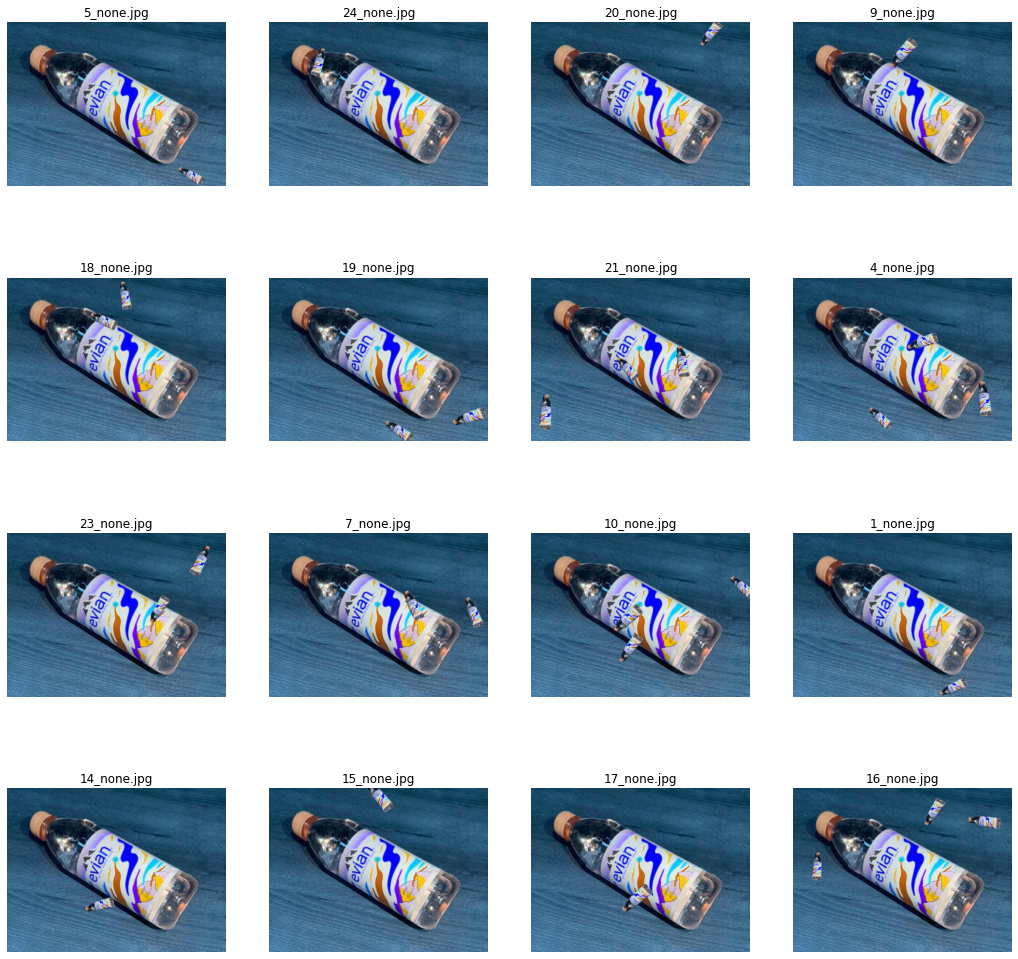

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

pasta = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images'
caminho_names = []
name_image = []
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        img_names = os.path.join(diretorio, arquivo)
        caminho_names.append(img_names)
        name_image.append(arquivo)

L = 4
W = 4

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L*W):
    img = cv2.imread(caminho_names[i])
    axes[i].imshow(img)
    axes[i].set_title(name_image[i])
    axes[i].axis('off')

plt.show()

Na pasta `output_dir` poderemos encontrar duas outras pastas, a pasta com as imagens geradas `images`, e a pasta `annotations` onde estão as anotações das imagens.

## Criação do arquivo csv

In [ ]:
%cd /content/Scripts-Dataset/Scripts/synthetic
!python generate_csv.py xml ./syndata-generation/output_dir/annotations synthetic.csv ./syndata-generation/output_dir/images
!mv /content/Scripts-Dataset/Scripts/synthetic/synthetic.csv /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir

/content/Scripts-Dataset/Scripts/synthetic
creating_images_dict: 100% 5/5 [00:00<00:00, 807.62it/s]


In [ ]:
# Mover todo o conteúdo do output dir para DataSet
!cp -r /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/* /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet

## Gerar train_eval

In [ ]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_train_eval_modified.py '/content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/synthetic.csv' -f 0.8 -o .

/content/Scripts-Dataset/Scripts/detection_util_scripts
generate_train_eval_modified.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  validation_df = validation_df.merge(exception, on='filename', how='left', indicator=True, suffixes=('', '_toremove')).query('_merge == "left_only"').drop('_merge', 1)


In [ ]:
!cp /content/Tensorflow_SynData/synthetic/syndata-generation/demo_data_dir/selected.txt /content/Tensorflow_SynData/Scripts/detection_util_scripts/DataSet

## Gerar arquivo Label_Map

In [ ]:
!cp /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/selected.txt /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet

In [ ]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet
!mv selected.txt Label_Map.txt

/content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet


In [ ]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_pbtxt.py txt ./DataSet/Label_Map.txt ./DataSet/Label_Map.pbtxt

/content/Scripts-Dataset/Scripts/detection_util_scripts


## Gerar Arquivo tfrecord (eval, train)

In [ ]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_tfrecord.py ./DataSet/synthetic_train.csv ./DataSet/Label_Map.pbtxt ./DataSet/images ./DataSet/train.record
!python generate_tfrecord.py ./DataSet/synthetic_eval.csv ./DataSet/Label_Map.pbtxt ./DataSet/images ./DataSet/eval.record

/content/Scripts-Dataset/Scripts/detection_util_scripts
['item {', 'id: 1', 'display_name: "arroz"', '}', '']
groups: 100% 5/5 [00:00<00:00, 303.13it/s]
Successfully created the TFRecords: /content/Scripts-Dataset/Scripts/detection_util_scripts/./DataSet/train.record
['item {', 'id: 1', 'display_name: "arroz"', '}', '']
groups: 0it [00:00, ?it/s]
Successfully created the TFRecords: /content/Scripts-Dataset/Scripts/detection_util_scripts/./DataSet/eval.record


**Baixar o arquivo Record para o seu drive na pasta weight**

In [ ]:
# Criar pasta weight no seu drive
!mkdir /content/drive/MyDrive/weight

In [ ]:
# comando para baixar o arquivo para a pasta weight
!cp /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/*.record /content/drive/MyDrive/weight/
!cp /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/Label_Map.txt /content/drive/MyDrive/weight/